<a href="https://colab.research.google.com/github/Fsyhnfh20/MachineLearningTasks/blob/main/week%205/Dataset_Hotel_Booking_Fasya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Nama : Fasya Hanifah
#NIM : 1103200149
#HOTEL BOOKING

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Library yang akan dijalankan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [3]:
 # Ganti 'nama_file.csv' dengan nama file CSV Anda
file_path = '/content/sample_data/hotel_bookings.csv'

# Baca file CSV menjadi dataframe
df = pd.read_csv(file_path)

In [20]:
#Menampilkan isi dataframe
df

,hotel,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_year,arrival_month,arrival_Week
0,Resort Hotel,0,342,1,0,0,2,0.0,0,BB,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,July,27
1,Resort Hotel,0,737,1,0,0,2,0.0,0,BB,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015,July,27
2,Resort Hotel,0,7,1,0,1,1,0.0,0,BB,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,July,27
3,Resort Hotel,0,13,1,0,1,1,0.0,0,BB,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015,July,27
4,Resort Hotel,0,14,1,0,2,2,0.0,0,BB,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015,July,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,30,2,5,2,0.0,0,BB,...,0,Transient,96.14,0,0,Check-Out,2017-09-06,2017,August,35
119386,City Hotel,0,102,31,2,5,3,0.0,0,BB,...,0,Transient,225.43,0,2,Check-Out,2017-09-07,2017,August,35
119387,City Hotel,0,34,31,2,5,2,0.0,0,BB,...,0,Transient,157.71,0,4,Check-Out,2017-09-07,2017,August,35
119388,City Hotel,0,109,31,2,5,2,0.0,0,BB,...,0,Transient,104.40,0,0,Check-Out,2017-09-07,2017,August,35


In [21]:
# Tampilkan jumlah nilai unik untuk setiap fitur
print(df.nunique(axis=0))

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list               128
customer_type                        4
adr                               8879
required_car_parking_spac

In [22]:
#Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119386 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  country                         118902 non-null  object 
 11  market_segment                  119390 non-null  object 
 12  distribution_cha

In [24]:
#Mengubah Atribut 'arrival_date_year', 'arrival_date_month','arrival_date Menjadi 'arrival_year' dan 'arrival_month', dan 'arrival_week'
df['arrival_year'] =  df['arrival_date_year']
df['arrival_month'] = df['arrival_date_month']
df['arrival_week'] = df['arrival_date_week_number']

# Menghapus Atribut Lama
df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number'], inplace=True)

KeyError: ignored

In [12]:
#Melihat Keberadaan Data 'null' (missing value) pada Dataset
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr             

In [13]:
#Melihat Deskripsi Statistika Dataset
df.describe()

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_year,arrival_Week
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016.156554,27.165173
std,0.482918,106.863097,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,0.707476,13.605138
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2015.000000,1.000000
25%,0.000000,18.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016.000000,16.000000
50%,0.000000,69.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016.000000,28.000000
75%,1.000000,160.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017.000000,38.000000
max,1.000000,737.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017.000000,53.000000


In [26]:
#Cek Nilai 0 pada Atribut 'Adult' dan 'children'
adults = (df.adults == 0).sum()
children = (df.children == 0).sum()

print("Nilai 0 di kolom yang ada: ", adults)
print("Nilai 0 di kolom yang ada: ", children)

Nilai 0 di kolom yang ada:  403
Nilai 0 di kolom yang ada:  110796


In [27]:
#Cek Ukuran Data Saat Ini
df.shape

(119390, 32)

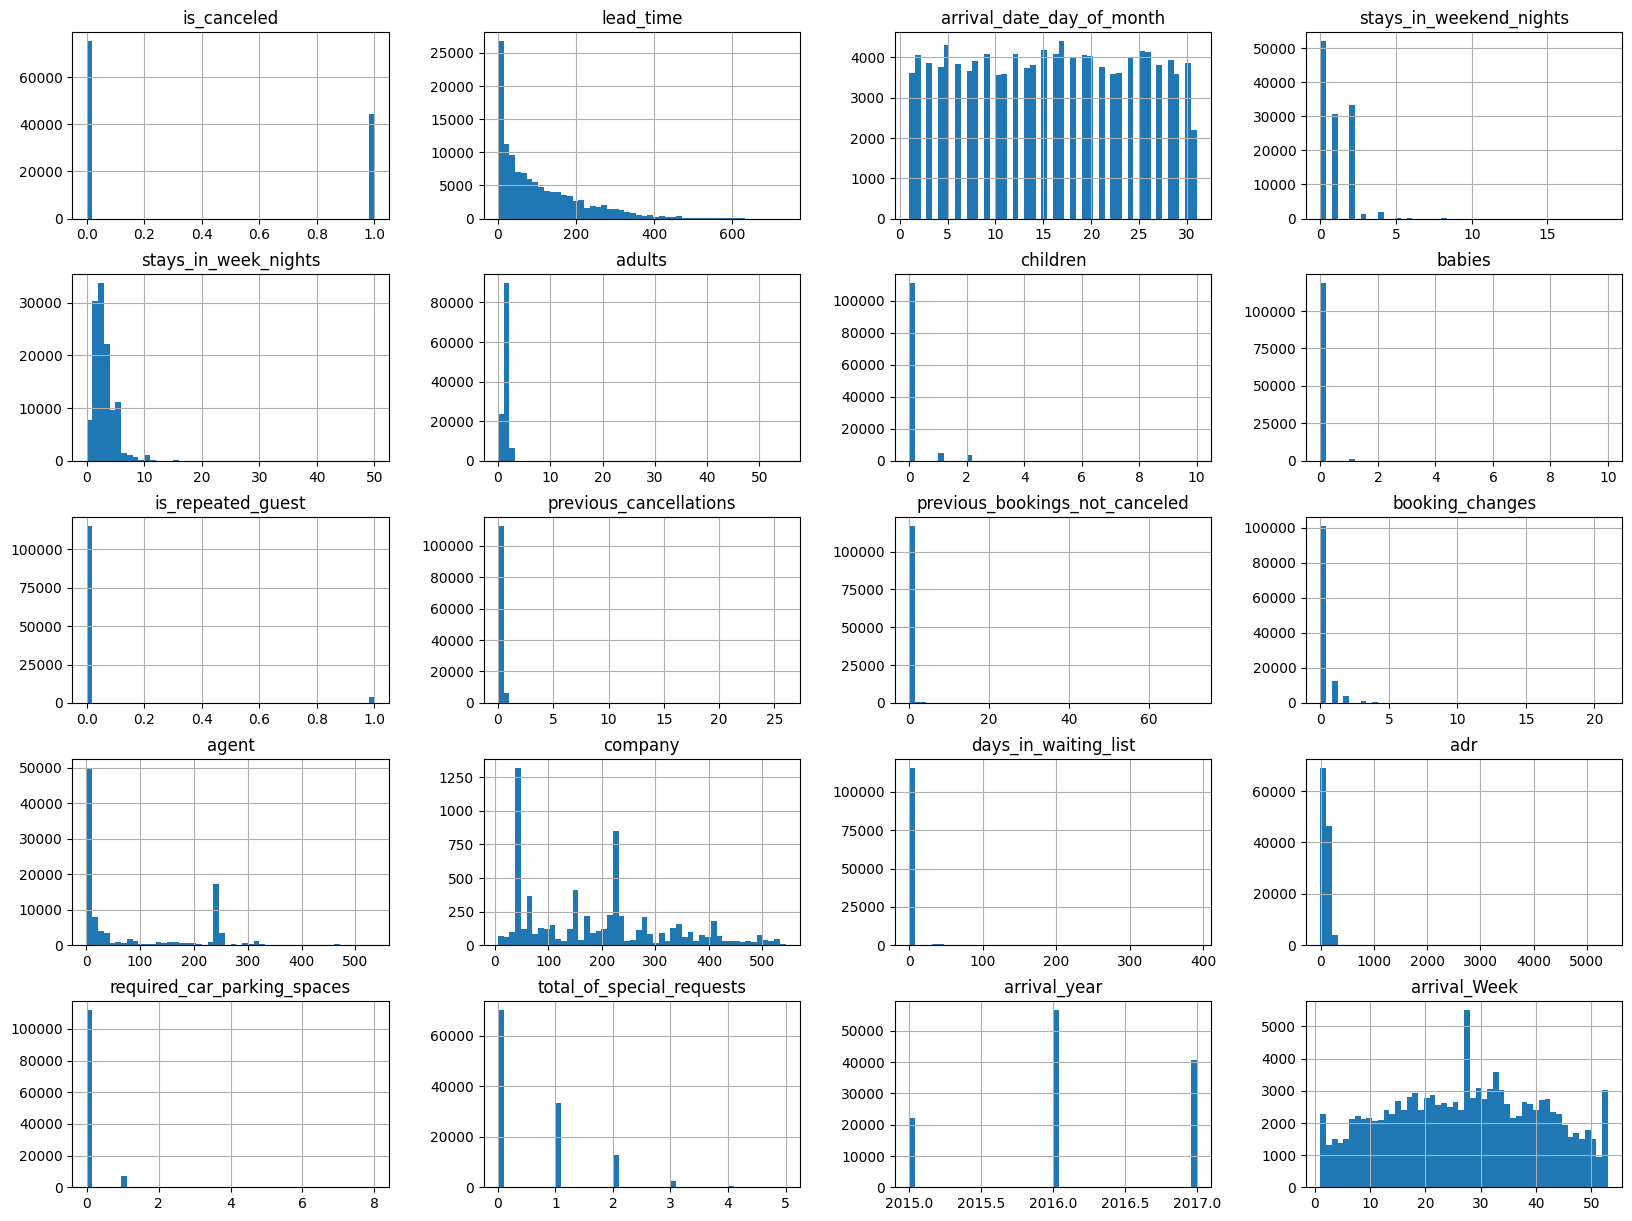

In [28]:
#Analisis Fitur Numerik dengan data fitur tunggal
df.hist(bins=50, figsize=(20,15))
plt.show()

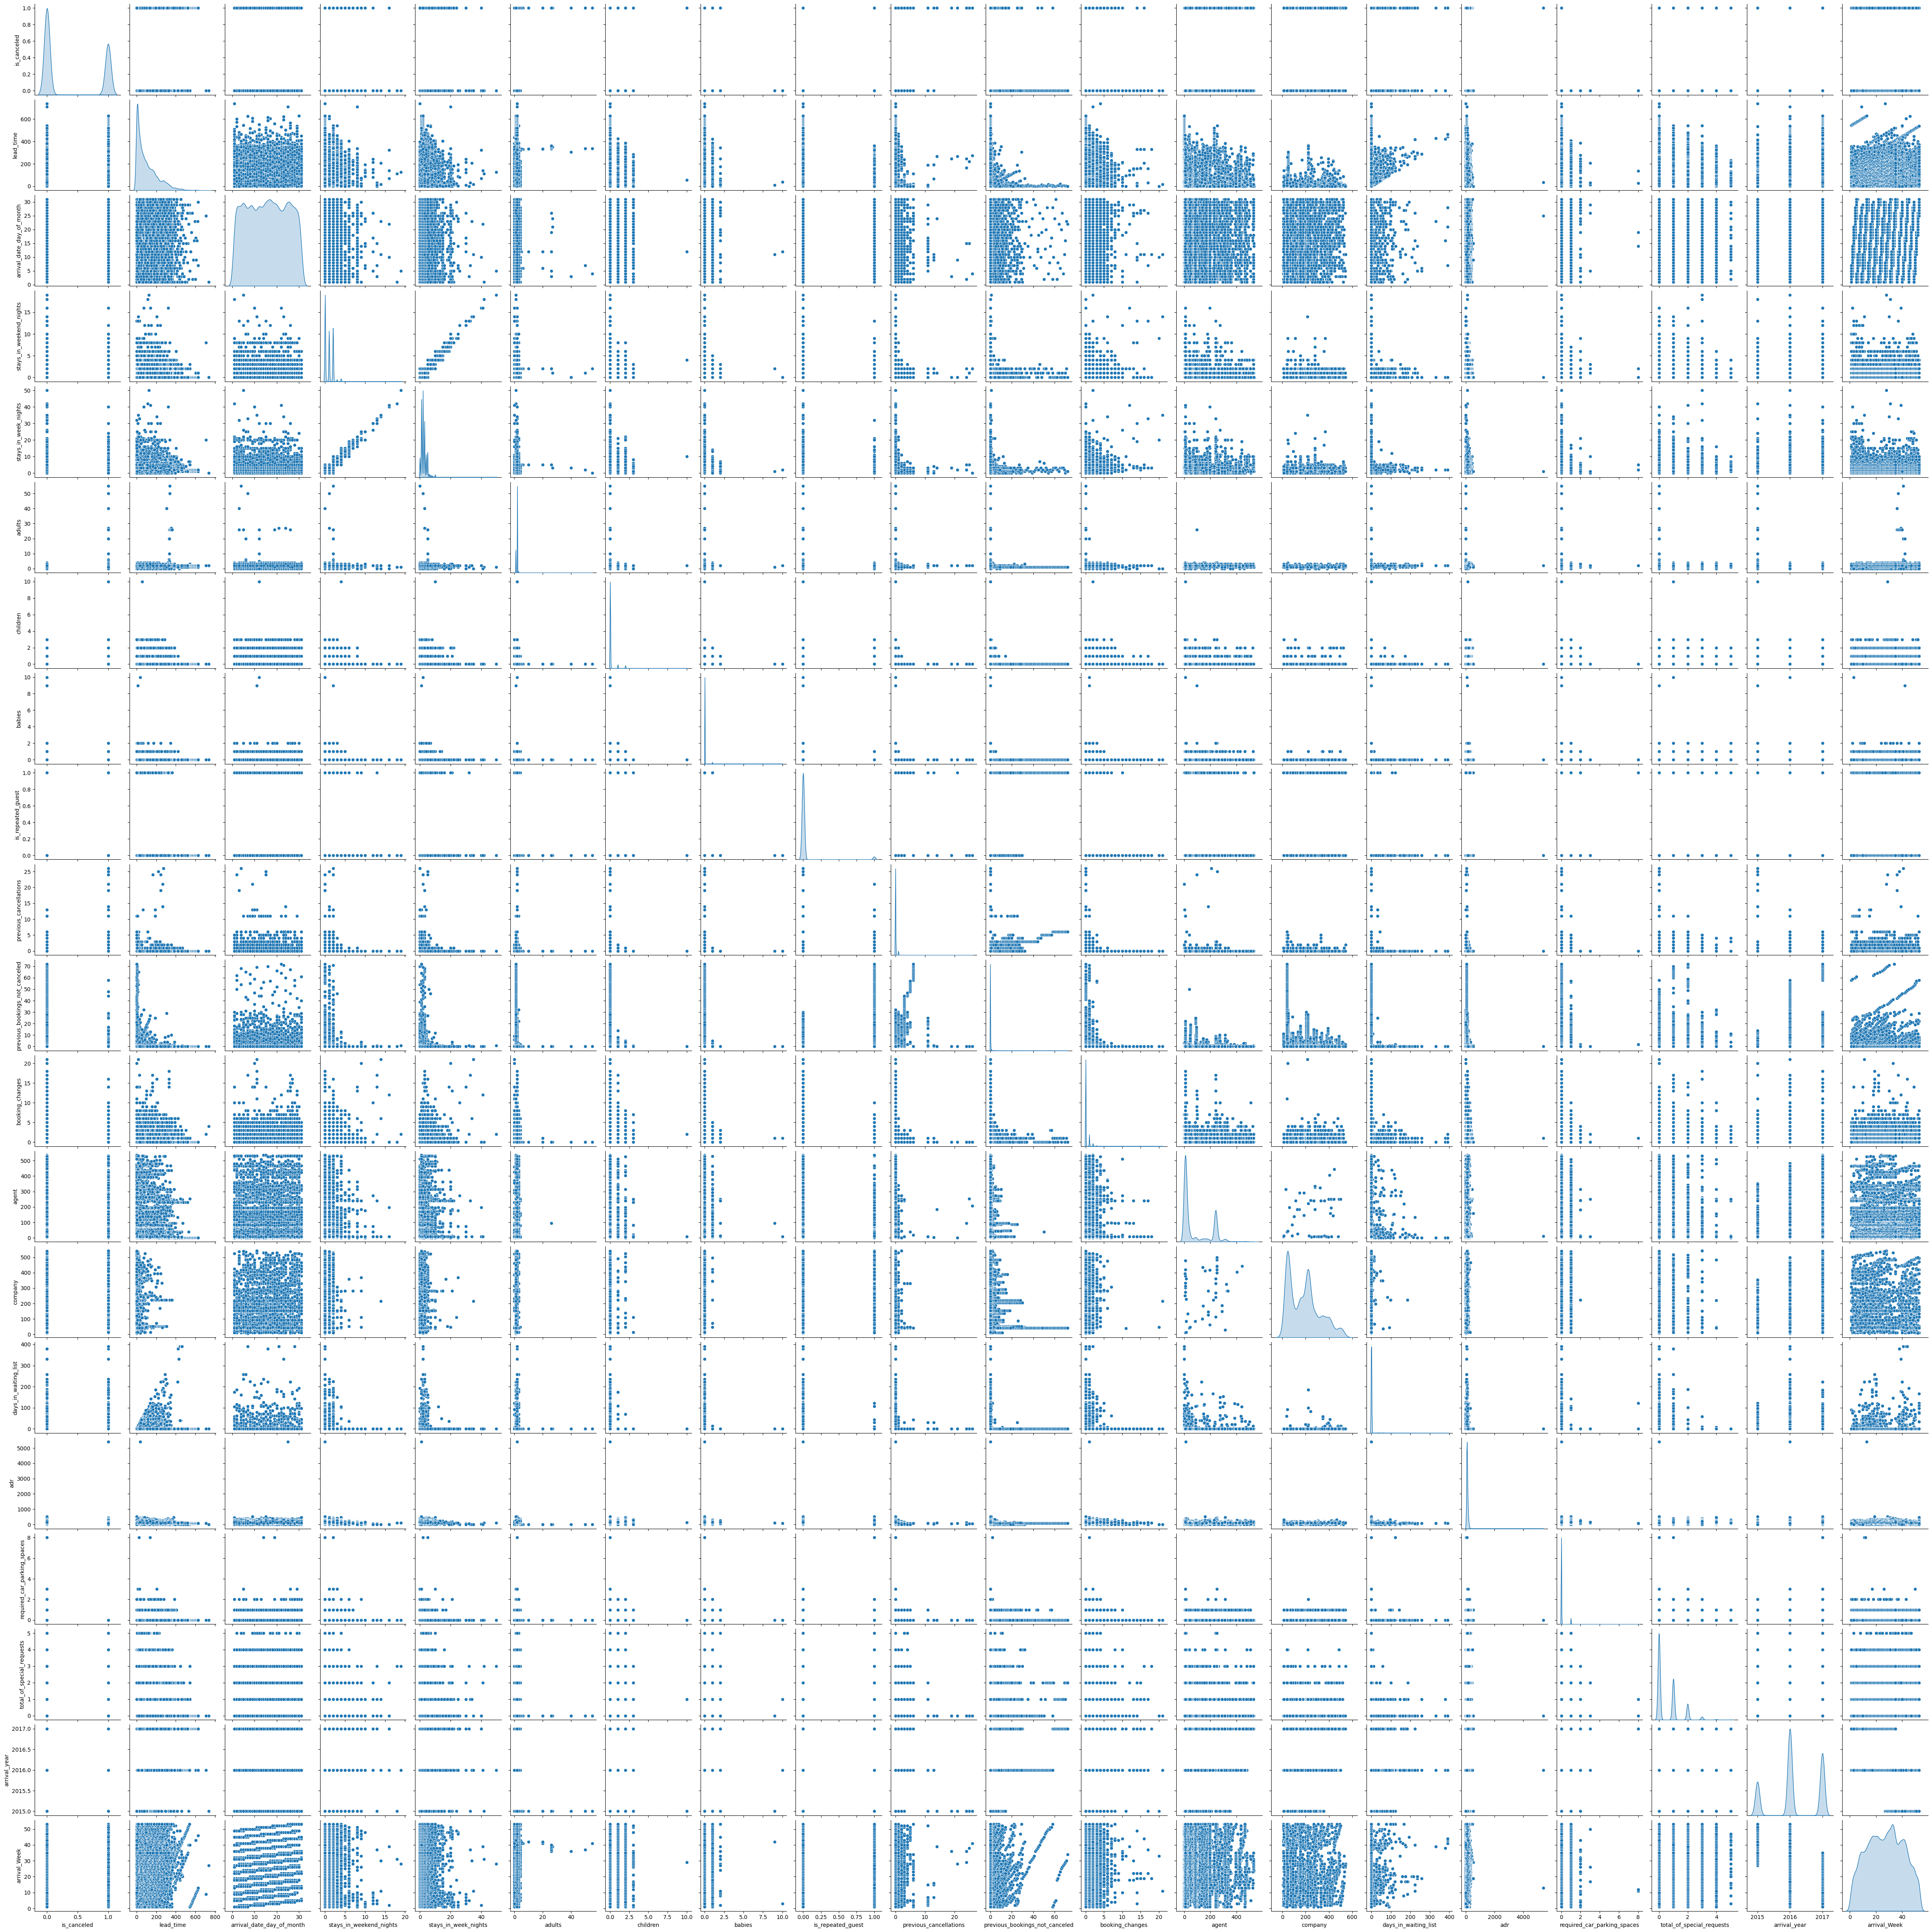

In [29]:
#Mengamati Hubungan Antar Fitur Numerik dengan Fungsi 'pairplot()'
sns.pairplot(df, diag_kind = 'kde')

<ipython-input-30-15665966c9df>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur ')

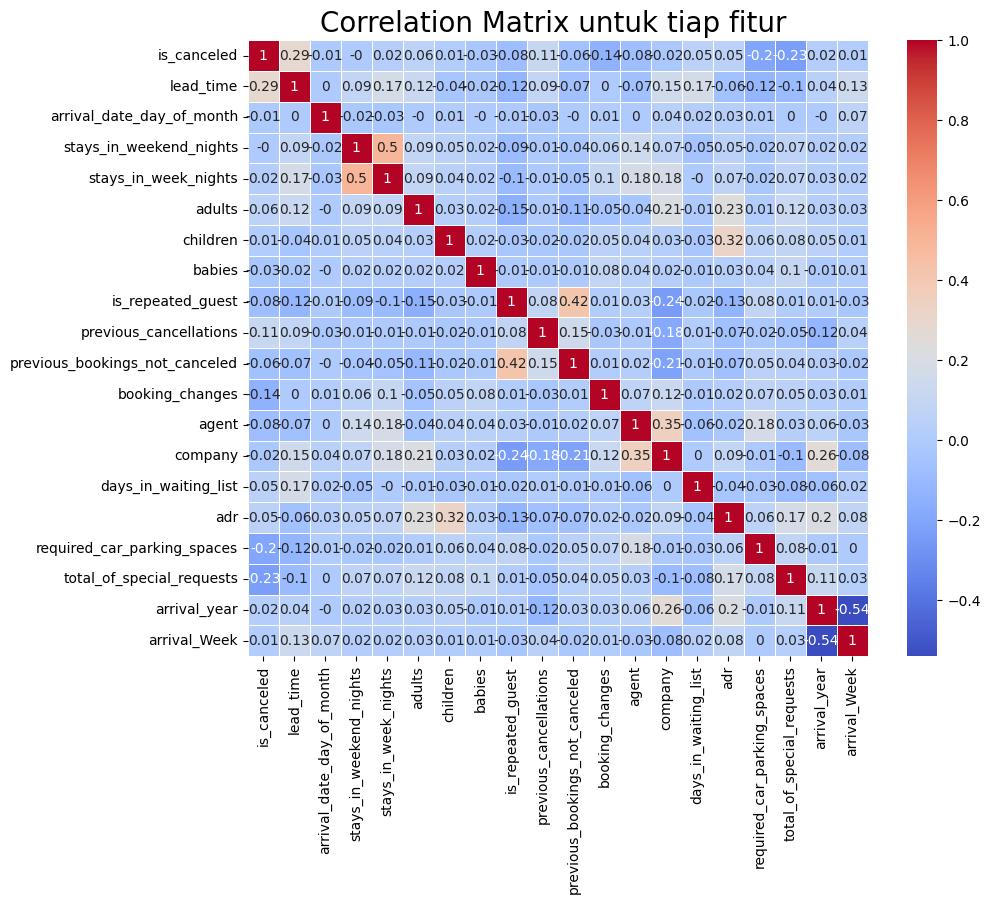

In [30]:
#Evaluasai Skor Korelasi dengan Fungsi 'corr()'
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)

In [33]:
#Inisialisasi atribut dan target
X = df[['arrival_year', 'arrival_month', 'arrival_Week']]
y = df['is_canceled']

In [34]:
#Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [35]:
#Menampilkan total dataset secara keseluruhan, total dataset latih, total dataset uji.
print(f'Total # sampel di seluruh dataset: {len(X)}')
print(f'Total # sampel di seluruh dataset: {len(X_train)}')
print(f'Total # sampel di seluruh datasett: {len(X_test)}')

Total # sampel di seluruh dataset: 119390
Total # sampel di seluruh dataset: 107451
Total # sampel di seluruh datasett: 11939
